In [1]:
import pandas as pd

In [3]:
data=pd.read_csv(r'C:\Users\Admin\Desktop\Desktop\Music-recommendation-system\Spotify Dataset Analysis\data.csv.zip',compression='zip')
data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [4]:
data.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [3]:
data.drop_duplicates(inplace=True,subset=['name'])

In [4]:
name=data['name']

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [6]:
col_features = ['danceability', 'energy', 'valence', 'loudness']
X = MinMaxScaler().fit_transform(data[col_features])
kmeans = KMeans(init="k-means++",
                n_clusters=2,
                random_state=15).fit(X)
data['kmeans'] = kmeans.labels_

In [7]:
data['song_name']=name

In [8]:
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,mode,name,popularity,release_date,speechiness,tempo,valence,year,kmeans,song_name
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,...,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,0,Singende Bataillone 1. Teil
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,...,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,1,"Fantasiestücke, Op. 111: Più tosto lento"
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,...,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,0,Chapter 1.18 - Zamek kaniowski
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,...,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,1,Bebamos Juntos - Instrumental (Remasterizado)
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,...,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169901,0.2640,"['Meek Mill', 'Roddy Ricch']",0.744,167845,0.7020,1,0j2CNrgtalXRGIvHMO2vzh,0.000000,7,0.1200,...,0,Letter To Nipsey (feat. Roddy Ricch),66,2020-01-27,0.2880,91.885,0.3380,2020,0,Letter To Nipsey (feat. Roddy Ricch)
169903,0.2100,"['LEGADO 7', 'Junior H']",0.795,218501,0.5850,0,52Cpyvd2dKb6XRn313nH87,0.000001,8,0.1120,...,1,Ojos De Maniaco,68,2020-02-28,0.0374,97.479,0.9340,2020,0,Ojos De Maniaco
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,...,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020,1,Skechers (feat. Tyga) - Remix
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,...,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020,1,Sweeter (feat. Terrace Martin)


In [9]:
cluster=data.groupby(by=data['kmeans'])

In [10]:
y=data.pop('kmeans')
x=data.drop(columns=['name','artists','id','release_date','song_name'])


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [12]:
!pip install lightgbm
from lightgbm import LGBMClassifier
model=LGBMClassifier().fit(x_train,y_train)

In [13]:
model.score(x_train,y_train)

0.9992979288902262

In [14]:
model.score(x_test,y_test)

0.9946141116293065

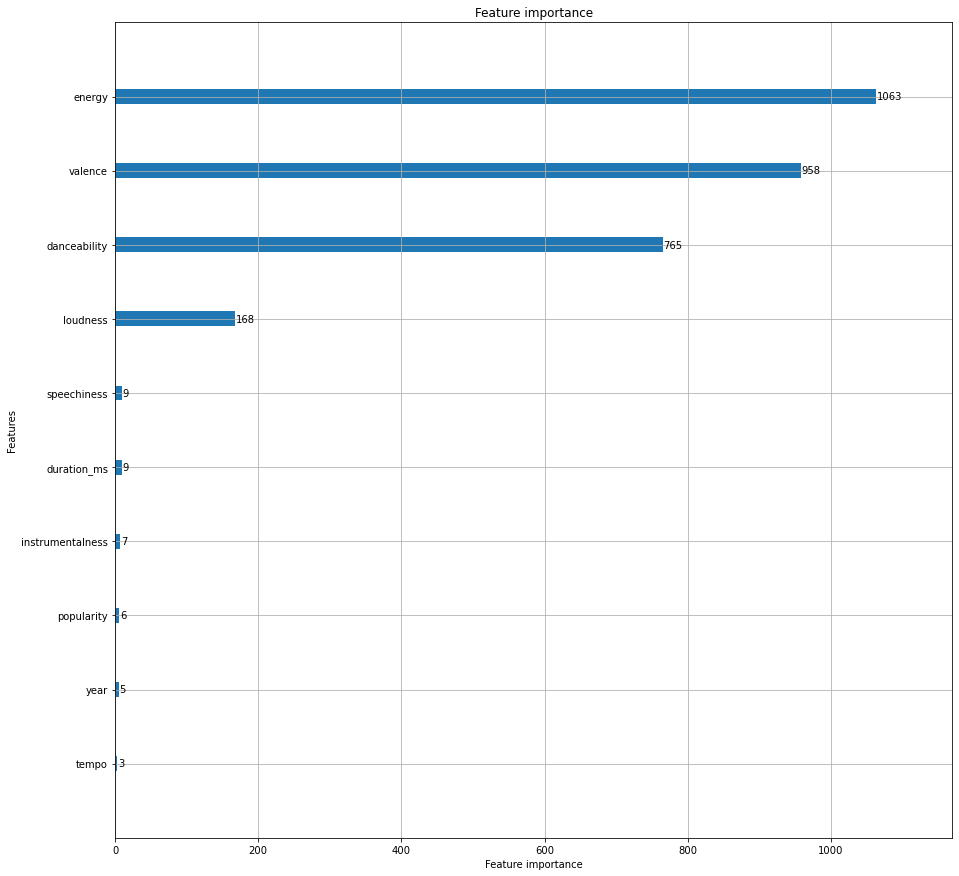

In [15]:
import lightgbm
import matplotlib.pyplot as plt
ax = lightgbm.plot_importance(model, max_num_features=10, figsize=(15,15))
plt.show()

In [16]:
df=cluster.apply(lambda x: x.sort_values(["popularity"],ascending=False))
df.reset_index(level=0, inplace=True)

In [17]:
from keras.preprocessing.image import img_to_array
import imutils
from keras.models import load_model
import numpy as np
import cv2

In [26]:
detection_model_path = 'haarcascade_frontalface_default.xml'
emotion_model_path = 'final_model3.h5'
face_detection = cv2.CascadeClassifier(detection_model_path)
emotion_classifier = load_model(emotion_model_path, compile=False)
EMOTIONS = ["happy","sad"]

In [39]:
from keras.preprocessing import image
def emotion_testing():
        cap=cv2.VideoCapture(0)
        while True:
            ret,test_img=cap.read()# captures frame and returns boolean value and captured image
            if not ret:
                continue
            gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

            faces_detected = face_detection.detectMultiScale(gray_img, 1.32, 5)


            for (x,y,w,h) in faces_detected:
                cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
                roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
                roi_gray=cv2.resize(roi_gray,(48,48))
                img_pixels = image.img_to_array(roi_gray)
                img_pixels = np.expand_dims(img_pixels, axis = 0)
                img_pixels /= 255

                predictions = emotion_classifier.predict(img_pixels)

                #find max indexed array
                max_index = np.argmax(predictions[0])
                predicted_emotion = EMOTIONS[max_index]

                cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

            resized_img = cv2.resize(test_img, (1000, 700))
            cv2.imshow('Facial emotion analysis ',resized_img)



            if cv2.waitKey(0) & 0xFF == ord('q'):
                     break
        cap.release()
        cv2.destroyAllWindows
        return predicted_emotion

In [46]:
emotion_word=emotion_testing()
if emotion_word=='sad':
    emotion_code=0
else:
    emotion_code=1

In [47]:
def get_results(emotion_code):
  NUM_RECOMMEND=10
  happy_set=[]
  sad_set=[]
  if emotion_code==0:
      happy_set.append(df[df['kmeans']==0]['song_name'].head(NUM_RECOMMEND))
      return pd.DataFrame(happy_set).T
  else:
      sad_set.append(df[df['kmeans']==1]['song_name'].head(NUM_RECOMMEND))
      return pd.DataFrame(sad_set).T

In [5]:
from yt_dlp import YoutubeDL

def get_youtube_audio_url(query):
    with YoutubeDL({'format': 'bestaudio', 'quiet': True}) as ydl:
        try:
            info = ydl.extract_info(f"ytsearch:{query}", download=False)['entries'][0]
            return info['url']
        except Exception as e:
            return None


In [6]:
query = "shape of you ed sheeran"
audio_url = get_youtube_audio_url(query)

In [7]:
audio_url

'https://rr5---sn-42u-i5oly.googlevideo.com/videoplayback?expire=1744139415&ei=NiD1Z6P6O8ysvcAPsPnk-As&ip=58.187.67.170&id=o-AA27XxSa_454Ry4Rg-R6d6NLpEK5RP3Op7X88a1i1Gnp&itag=251&source=youtube&requiressl=yes&xpc=EgVo2aDSNQ%3D%3D&met=1744117814%2C&mh=Ql&mm=31%2C26&mn=sn-42u-i5oly%2Csn-oguesn6s&ms=au%2Conr&mv=m&mvi=5&pl=24&rms=au%2Cau&initcwndbps=3321250&bui=AccgBcMb2DrShPfErav4v_o9Qa9ilAjs5xgvy-KjvJkOD01BvnibtRSRtJiIhnQh3W97IsywOC_c8PhB&vprv=1&svpuc=1&mime=audio%2Fwebm&ns=frOCTYL8godwgK3on_cXzeYQ&rqh=1&gir=yes&clen=4171750&dur=263.241&lmt=1715393389142958&mt=1744117283&fvip=4&keepalive=yes&lmw=1&c=TVHTML5&sefc=1&txp=4532434&n=-JthE5lCB-DX_w&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cxpc%2Cbui%2Cvprv%2Csvpuc%2Cmime%2Cns%2Crqh%2Cgir%2Cclen%2Cdur%2Clmt&lsparams=met%2Cmh%2Cmm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl%2Crms%2Cinitcwndbps&lsig=ACuhMU0wRQIhANzR0kkNA9O2Ww9f7fU7caheyPN4elQUMS2jEUxB4qo7AiAWOgeOxxvO0_tt-QLf_y9IpwkR98iPQlM4gYS3LkPe-w%3D%3D&sig=AJfQdSswRgIhAO-h6Sk4sTKKclmEsGju9SW

In [48]:
print(get_results(emotion_code))
if emotion_word=='sad':
    print('emotion detected is SAD')
else:
    print('emotion detected is HAPPY')

                                  song_name
87852  ily (i love you baby) (feat. Emilee)
87844                            Supalonely
87953     Stuck with U (with Justin Bieber)
87858                          Dance Monkey
87952       Rain On Me (with Ariana Grande)
87951                                 GOOBA
87850                       Don't Start Now
87890                           Breaking Me
87969                            Boss Bitch
87970                        Yo Perreo Sola
emotion detected is SAD


In [ ]:
class ODE(nn.Module):

    # init ODE variables
    def __init__(self, dim):
        super(ODE, self).__init__()
        self.norm1 = norm(dim)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = conv3x3(dim, dim)
        self.norm2 = norm(dim)
        self.conv2 = conv3x3(dim, dim)
        self.norm3 = norm(dim)
        self.nfe = 0
        

    # init ODE operations 
    def forward(self, t, x):
      #nfe = number of function evaluations per timestep
        self.nfe += 1
        out = self.norm1(x)
        out = self.relu(out)
        out = self.conv1(out)
        out = self.norm2(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.norm3(out)
        return out


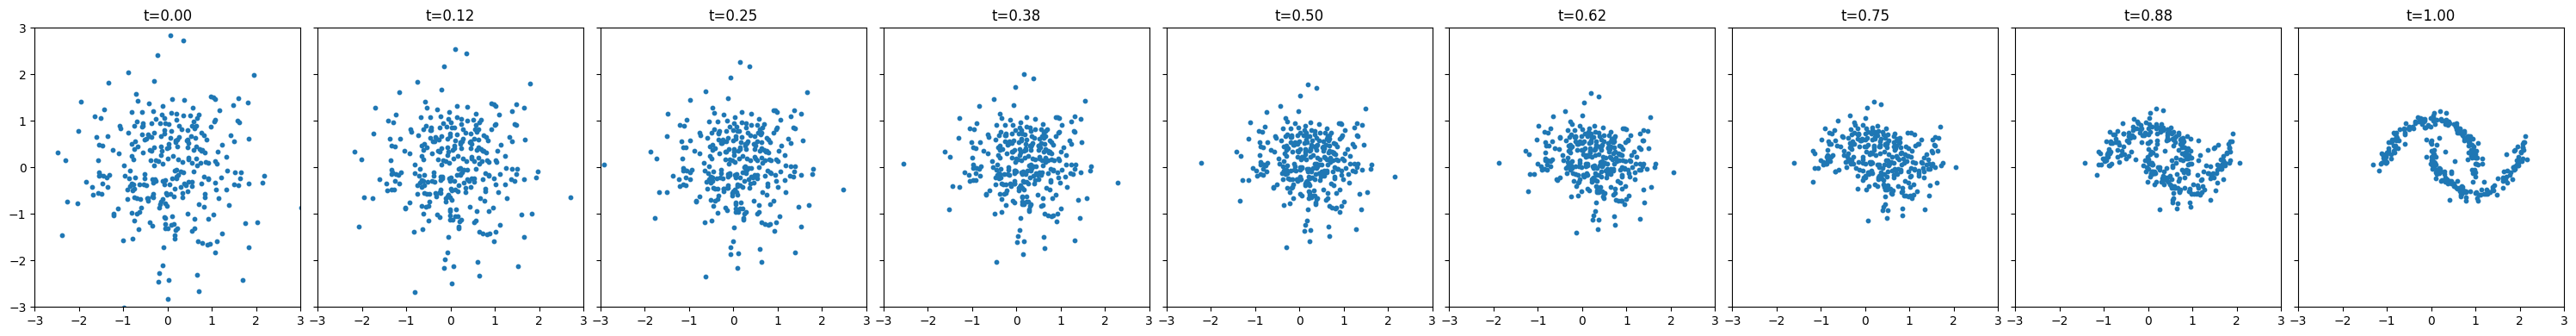

In [8]:
import torch
from torch import nn, Tensor
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

class Flow(nn.Module):
    def __init__(self, dim: int = 2, h: int = 64):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim + 1, h), nn.ELU(),
            nn.Linear(h, h), nn.ELU(),
            nn.Linear(h, h), nn.ELU(),
            nn.Linear(h, dim)
        )

    def forward(self, x_t: Tensor, t: Tensor) -> Tensor:
        return self.net(torch.cat((t, x_t), -1))

    def step(self, x_t: Tensor, t_start: Tensor, t_end: Tensor) -> Tensor:
        t_start = t_start.view(1, 1).expand(x_t.shape[0], 1)
        return x_t + (t_end - t_start) * self(
            x_t + self(x_t, t_start) * (t_end - t_start) / 2,
            t_start + (t_end - t_start) / 2
        )

# Training
flow = Flow()
optimizer = torch.optim.Adam(flow.parameters(), 1e-2)
loss_fn = nn.MSELoss()

for _ in range(10000):
    x_1 = Tensor(make_moons(256, noise=0.05)[0])
    x_0 = torch.randn_like(x_1)
    t = torch.rand(len(x_1), 1)
    x_t = (1 - t) * x_0 + t * x_1
    dx_t = x_1 - x_0
    optimizer.zero_grad()
    loss_fn(flow(x_t, t), dx_t).backward()
    optimizer.step()

# Sampling
x = torch.randn(300, 2)
n_steps = 8
fig, axes = plt.subplots(1, n_steps + 1, figsize=(30, 4), sharex=True, sharey=True)
time_steps = torch.linspace(0, 1.0, n_steps + 1)

axes[0].scatter(x.detach()[:, 0], x.detach()[:, 1], s=10)
axes[0].set_title(f't={time_steps[0]:.2f}')
axes[0].set_xlim(-3.0, 3.0)
axes[0].set_ylim(-3.0, 3.0)

for i in range(n_steps):
    x = flow.step(x, time_steps[i], time_steps[i + 1])
    axes[i + 1].scatter(x.detach()[:, 0], x.detach()[:, 1], s=10)
    axes[i + 1].set_title(f't={time_steps[i + 1]:.2f}')

plt.tight_layout()
plt.show()
